In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler


In [ ]:
X, y = make_classification(n_samples=1000, n_features=5,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

x = pd.DataFrame(X)
Y = pd.DataFrame(y)
df = pd.concat([x,Y], axis = 1)
df.columns = ['feature_1', 'feature_2', 'feature_3','feature_4','feature_5','label']
print(df.head())
df.info()

   feature_1  feature_2  feature_3  feature_4  feature_5  label
0  -1.668532  -1.299013   0.274647  -0.603620   0.708860      0
1  -2.972883  -1.088783   0.422819  -3.116857   0.644452      0
2  -0.596141  -1.370070  -1.913743   0.663562  -0.154072      0
3  -1.068947  -1.175057   1.193612  -0.098161  -0.886614      0
4  -1.305269  -0.965926  -0.147354   1.059806   0.026247      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1000 non-null   float64
 1   feature_2  1000 non-null   float64
 2   feature_3  1000 non-null   float64
 3   feature_4  1000 non-null   float64
 4   feature_5  1000 non-null   float64
 5   label      1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


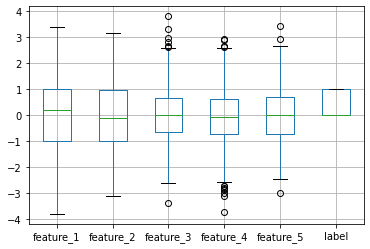

In [ ]:
df.boxplot()

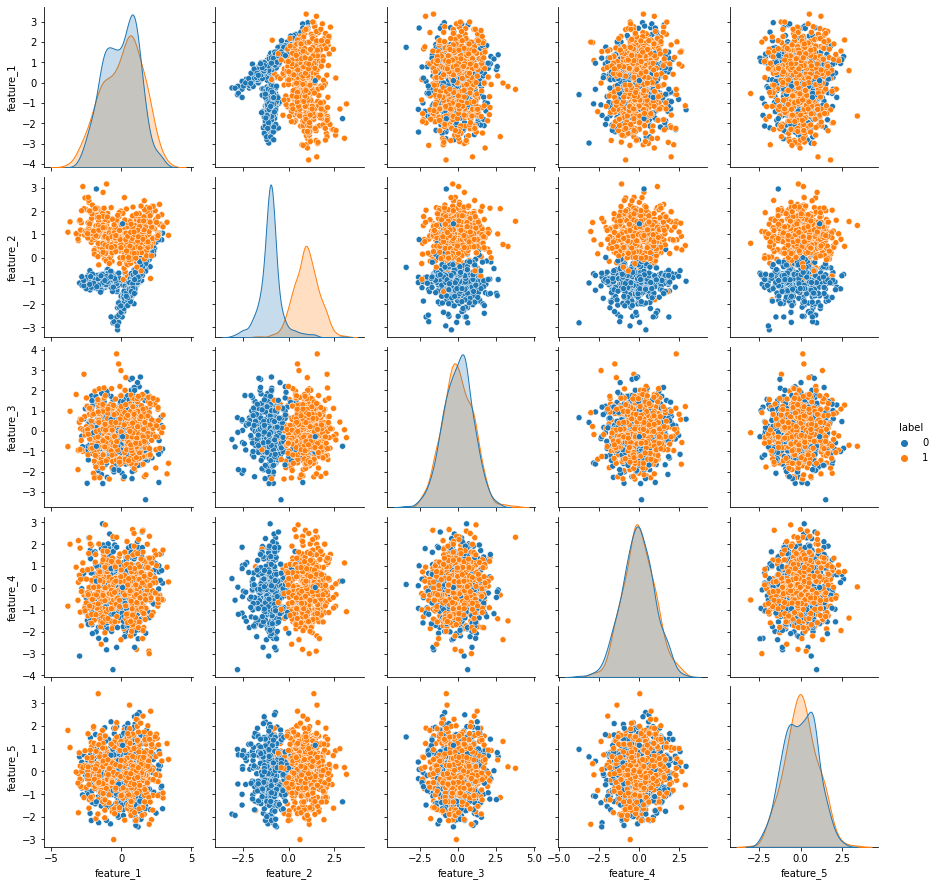

In [ ]:
sns.pairplot(df, hue='label')

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [ ]:
min_ = MinMaxScaler()
min_.fit(X)
X = min_.transform(X)

#X = MinMaxScaler().fit_transform(X)
print('Min: ' + str(np.min(X, axis = 0)))
print('Max: ' + str(np.max(X, axis = 0)))
print(X)

Min: [0. 0. 0. 0. 0.]
Max: [1. 1. 1. 1. 1.]
[[0.29751701 0.2879561  0.50972581 0.47029354 0.57745365]
 [0.11596437 0.32143296 0.53032245 0.09345114 0.56744321]
 [0.44678305 0.27664113 0.20552759 0.66029873 0.44333382]
 ...
 [0.6574128  0.67092235 0.58614307 0.9343834  0.62454626]
 [0.54371747 0.72710055 0.43245472 0.56330728 0.6466264 ]
 [0.67472955 0.49164521 0.38801785 0.58073528 0.13001546]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Tamaño X: ' + str(len(x)))
print('Tamaño y: ' + str(len(y)))
print('Tamaño X_train: ' + str(len(X_train)))
print('Tamaño y_train: ' + str(len(y_train)))
print('Tamaño X_test: ' + str(len(X_test)))
print('Tamaño y_test: ' + str(len(y_test)))

Tamaño X: 1000
Tamaño y: 1000
Tamaño X_train: 500
Tamaño y_train: 500
Tamaño X_test: 500
Tamaño y_test: 500


In [ ]:
clf = Perceptron(tol=1e-3)
clf.fit(X_train, y_train)

Perceptron()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


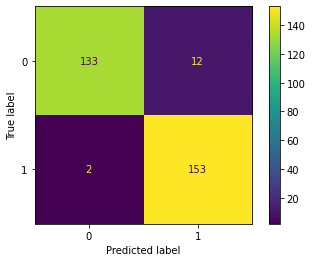

In [ ]:
plot_confusion_matrix(clf, X_test, y_test) 

In [ ]:
y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))

tn: 133
fp: 12
fn: 2
tp: 153


https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [ ]:
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('F1 score: ' + str(f1_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred)))
print('Recall: ' + str(recall_score(y_test, y_pred)))

Accuracy: 0.9533333333333334
F1 score: 0.95625
Precision: 0.9272727272727272
Recall: 0.9870967741935484


**¿Como verificar el comportamiento del algoritmo con varios parámetros de forma sencilla?**

In [26]:
acc = []
for i in [1e-100000,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]:
  clf = Perceptron(tol=i, max_iter=1000000000)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))

[0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.8133333333333334, 0.86, 0.86, 0.86, 0.86, 0.86]


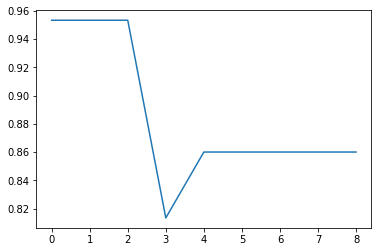

In [27]:
print(acc)
import matplotlib.pyplot as plt

plt.plot(acc)
